## DUE DATE: Thursday, June 28, 2018

# Predicting the Amount of Money Spent on Insured Customers 

### For this assignment, we will be analyzing insured customers' data for an insurance company:
**Based on a sample data that consists of the profile of insured customers, we want to be able to predict the dollar amount of money spent by the insurance company on insured customers.**

### Insured ustomers' Data
The insured customers' data is in a csv file. It has information sconsisting of:
1. age
2. sex (female, male)
3. BMI
4. Children
5. Smoker (yes, no)
6. Region (northeast, northwest, southeast, southwest])
7. **expenses**

The value we want to predict is **expenses**


## 1. Import the Libraries:
1. numpy
2. matplotlib.pyplot
3. pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Read the csv file: "insurance.csv"

In [2]:
df = pd.read_csv("insurance.csv")

## 3. Show a sample of the data (first 10 rows)

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


## 4. Show some statistics about the data

In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## 5. Show info about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## 6. Convert the columns with text data into numeric data

In [6]:
df = pd.read_csv("insurance.csv")
#df.sex.replace(['female','male'],[0,1],inplace = True)
df.smoker.replace(['no','yes'], [0,1], inplace = True)
df["female"]=df.sex.replace(['male','female'], [0,1], inplace = False)
df["male"]=df.sex.replace(['male','female'], [1,0], inplace = False)
df.drop('sex',axis=1,inplace = True)
df["northeast"]=df.region.replace(['northeast','southeast','southwest','northwest'], [1,0,0,0], inplace = False)
df["southeast"]=df.region.replace(['northeast','southeast','southwest','northwest'], [0,1,0,0], inplace = False)
df["southwest"]=df.region.replace(['northeast','southeast','southwest','northwest'], [0,0,1,0], inplace = False)
df["northwest"]=df.region.replace(['northeast','southeast','southwest','northwest'], [0,0,0,1], inplace = False)
df.drop('region',axis=1,inplace = True)
df


,age,bmi,children,smoker,expenses,female,male,northeast,southeast,southwest,northwest
0,19,27.9,0,1,16884.92,1,0,0,0,1,0
1,18,33.8,1,0,1725.55,0,1,0,1,0,0
2,28,33.0,3,0,4449.46,0,1,0,1,0,0
3,33,22.7,0,0,21984.47,0,1,0,0,0,1
4,32,28.9,0,0,3866.86,0,1,0,0,0,1
5,31,25.7,0,0,3756.62,1,0,0,1,0,0
6,46,33.4,1,0,8240.59,1,0,0,1,0,0
7,37,27.7,3,0,7281.51,1,0,0,0,0,1
8,37,29.8,2,0,6406.41,0,1,1,0,0,0
9,60,25.8,0,0,28923.14,1,0,0,0,0,1


## 7. Based on this data, what looks to be the most correlated feature with "Expenses"? (Justify your answer)

Based on the correlation coefficient values of each feature against the expenses, a few features (Male, Northeast, Southeast, Age, BMI, Children, Smoker) results positively correlated while the remaining features (female, northwest, southwest) are inversely related. From all of the features, smokers have the highest correlation (0.79) with the expenses indicating that smoking will have the highest impact on total expenditure during a year. The results are shocking because smoking is more costly than a combination of the other positively correlated features. 

In [7]:
print('Male vs Expenses = ','\n','correlation coefficients:\n', np.corrcoef(df['male'],df['expenses']),'\n')
print('Female vs Expenses = ','\n','correlation coefficients:\n', np.corrcoef(df['female'],df['expenses']),'\n')
print('Northeast vs Expenses = ','\n','correlation coefficients:\n', np.corrcoef(df['northeast'],df['expenses']),'\n')
print('Southeast vs Expenses = ','\n','correlation coefficients:\n', np.corrcoef(df['southeast'],df['expenses']),'\n')
print('Northwest vs Expenses = ','\n','correlation coefficients:\n', np.corrcoef(df['northwest'],df['expenses']),'\n')
print('Southwest vs Expenses = ','\n','correlation coefficients:\n', np.corrcoef(df['southwest'],df['expenses']),'\n')
print('Age vs Expenses = ','\n','correlation coefficients:\n', np.corrcoef(df['age'],df['expenses']),'\n')
print('BMI vs Expenses = ','\n','correlation coefficients:\n', np.corrcoef(df['bmi'],df['expenses']),'\n')
print('Children vs Expenses = ','\n','correlation coefficients:\n', np.corrcoef(df['children'],df['expenses']),'\n')
print('smoker vs Expenses = ','\n','correlation coefficients:\n', np.corrcoef(df['smoker'],df['expenses']),'\n')

Male vs Expenses =  
 correlation coefficients:
 [[ 1.          0.05729207]
 [ 0.05729207  1.        ]] 

Female vs Expenses =  
 correlation coefficients:
 [[ 1.         -0.05729207]
 [-0.05729207  1.        ]] 

Northeast vs Expenses =  
 correlation coefficients:
 [[ 1.          0.00634877]
 [ 0.00634877  1.        ]] 

Southeast vs Expenses =  
 correlation coefficients:
 [[ 1.          0.07398155]
 [ 0.07398155  1.        ]] 

Northwest vs Expenses =  
 correlation coefficients:
 [[ 1.         -0.03990488]
 [-0.03990488  1.        ]] 

Southwest vs Expenses =  
 correlation coefficients:
 [[ 1.         -0.04321001]
 [-0.04321001  1.        ]] 

Age vs Expenses =  
 correlation coefficients:
 [[ 1.          0.29900819]
 [ 0.29900819  1.        ]] 

BMI vs Expenses =  
 correlation coefficients:
 [[ 1.          0.19857626]
 [ 0.19857626  1.        ]] 

Children vs Expenses =  
 correlation coefficients:
 [[ 1.          0.06799823]
 [ 0.06799823  1.        ]] 

smoker vs Expenses =  

## 8. Refer to the customers features data by "X", and refer to the label feature (expenses) by "y" 

In [8]:
X= df[['age','bmi','children','smoker','male','female','northwest','northeast','southwest','southeast']]
print(X,'\n')
y = df[['expenses']]
print(y)



      age   bmi  children  smoker  male  female  northwest  northeast  \
0      19  27.9         0       1     0       1          0          0   
1      18  33.8         1       0     1       0          0          0   
2      28  33.0         3       0     1       0          0          0   
3      33  22.7         0       0     1       0          1          0   
4      32  28.9         0       0     1       0          1          0   
5      31  25.7         0       0     0       1          0          0   
6      46  33.4         1       0     0       1          0          0   
7      37  27.7         3       0     0       1          1          0   
8      37  29.8         2       0     1       0          0          1   
9      60  25.8         0       0     0       1          1          0   
10     25  26.2         0       0     1       0          0          1   
11     62  26.3         0       1     0       1          0          0   
12     23  34.4         0       0     1       0    

## 9. Load the train_test_split function

In [9]:
from sklearn.model_selection import train_test_split

## 10. Split the data into:
1. a **training** data set, and
2. a **test** data set. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=49)
print("X_train= ", X_train,'\n')
print("y_train= ", y_train,'\n')
print("X_test= ", X_test,'\n')
print("y_test= ", y_test,'\n')

X_train=        age   bmi  children  smoker  male  female  northwest  northeast  \
1190   31  32.8         2       0     0       1          1          0   
428    21  16.8         1       0     0       1          0          1   
748    47  36.0         1       0     0       1          0          0   
558    35  34.1         3       1     0       1          1          0   
154    40  25.5         1       0     0       1          0          1   
556    46  33.4         1       0     1       0          0          1   
171    49  30.3         0       0     1       0          0          0   
401    47  47.5         1       0     1       0          0          0   
965    35  27.1         1       0     1       0          0          0   
184    44  30.7         2       0     1       0          0          0   
93     35  34.8         2       0     1       0          1          0   
1220   30  21.9         1       0     0       1          0          1   
165    47  28.2         4       0     1  

## 11. Import LinearRegression from sklearn.linear_model and create an instance of a LinearRegression() model named

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## 12. Fit the model to the training data

In [12]:
lm.fit(pd.DataFrame(X),pd.DataFrame(y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 13. Print the linear model's intercept and coefficients

In [13]:
print("Intercept: ", lm.intercept_,'\n')
print('Coefficient', lm.coef_,'\n')

Intercept:  [-12594.16137439] 

Coefficient [[   256.83917062    339.28986331    475.68891551  23847.47669504
     -65.67600705     65.67600705    234.13281096    586.92290648
    -372.38292292   -448.67279452]] 



## 14. Use the trained model to predict the test data set

In [14]:
predictions = lm.predict(X_test)
#compare predictions with y_test 

## 15. Create a scatterplot of the real test values versus the predicted values.

Text(0,0.5,'Predicted Y')

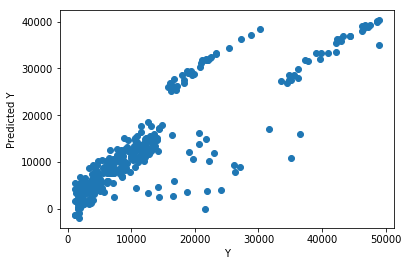

In [15]:
#plot preictions vs y_test 
plt.scatter(y_test, predictions)
plt.xlabel('Y')
plt.ylabel('Predicted Y')


## 16. Calculate: 
1. the Mean Absolute Error, 
2. Mean Squared Error, and 
3. the Root Mean Squared Error.

In [16]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 3890.55011681
MSE: 32341955.3782
RMSE: 5686.99880237


## 17. Show a histogram of the difference between the actual and predicted value of the test data set.

(array([  3.,   2.,   5.,   8.,   2.,   4.,   3.,   3.,   0.,   0.,   0.,
          0.,   0.,   2.,   2.,   1.,   5.,   2.,   5.,   7.,   7.,   7.,
          7.,  16.,  21.,  16.,  13.,  20.,  19.,  19.,  12.,  13.,  17.,
          8.,   9.,   6.,   7.,   3.,   4.,   0.,   0.,   1.,   0.,   1.,
          1.,   0.,   1.,   1.,   5.,   4.,   4.,   4.,   7.,   1.,   4.,
          4.,   1.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-11037.12108499, -10683.0880076 , -10329.05493021,  -9975.02185282,
         -9620.98877544,  -9266.95569805,  -8912.92262066,  -8558.88954327,
         -8204.85646589,  -7850.8233885 ,  -7496.79031111,  -7142.75723372,
         -6788.72415634,  -6434.69107895,  -6080.65800156,  -5726.62492417,
         -5372

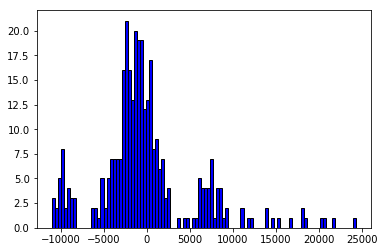

In [17]:
#subtract preditions - y_test to get the error assocated in the data

pred = predictions.reshape(1,len(predictions))
yp = np.array(y_test).reshape(1,len(y_test))
plt.hist(yp[0] - pred[0], color = 'blue', edgecolor = 'black', bins = 100)


## 18. Explain the meaning behind the coefficients of the model

The coefficients obtained from the data indicated that smoking has the highest correlation with expenses with a multiplication value of 23847. The coefficients correlation suggest that living in the northeast will result in the second most cost to yearly income and living in the southeast has the least relationship with annual expenses.

## 19. Use your own implementation of the Gradient Descent to find the intercept and coeficients of the linear regression model

In [18]:
def GradientDescentOwn(X, y, alpha = 0.001, n_iterations = 100):
    X_b = np.c_[np.ones((len(X), 1)), X]
    m = len(y)
    W = np.random.randn(X_b.shape[1],1)
    print('X =',X_b.shape)
    print('y =',y.shape)
    print('W =',W.shape)
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
        W = W - alpha * gradients
    print('W = \n',W, '\n')
    return W

W_2 = GradientDescentOwn(X_train, y_train, alpha= 0.0001, n_iterations = 100000)

print('W_1= ', lm.coef_)
#X_b = np.c_[np.ones((len(X_train), 1)), X_train]
#alpha = 0.0001
#n_iterations = 100000
#m = len(y_train)
#W = np.random.randn(X_b.shape[1],1)
#for iteration in range(n_iterations):
#    gradients = 1/m * X_b.T.dot(X_b.dot(W) - y_train)
#    W = W - alpha * gradients
#print(W)

X = (1003, 11)
y = (1003, 1)
W = (11, 1)
W = 
 [[ -2213.79492093]
 [   208.90822567]
 [   160.96665913]
 [   390.65205607]
 [ 19124.96187067]
 [  -785.87699949]
 [ -1428.17057409]
 [  -670.52786754]
 [   -54.51202766]
 [ -1071.06719161]
 [  -418.81099248]] 

W_1=  [[   256.83917062    339.28986331    475.68891551  23847.47669504
     -65.67600705     65.67600705    234.13281096    586.92290648
    -372.38292292   -448.67279452]]


## 20. Compare your results from #19 and #13

Gradient Descent Values: 
MAE: 4584.84133976
MSE: 36706779.8096
RMSE: 6058.61203657 

Linear Regression Values: 
MAE: 3890.55011681
MSE: 32341955.3782
RMSE: 5686.99880237


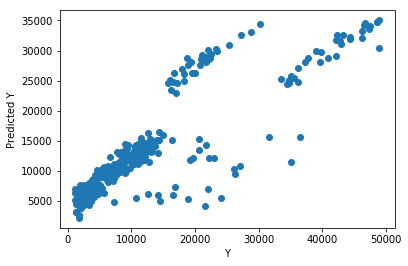

In [19]:
# compute the mean square error but overall describe in your own words. 
X_b = np.c_[np.ones((len(y_test),1)), X_test]

predictions_2 = X_b.dot(W_2)

#plot preictions vs y_test 
plt.scatter(y_test, predictions_2)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

from sklearn import metrics
print('Gradient Descent Values: ')
print('MAE:', metrics.mean_absolute_error(y_test, predictions_2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_2)),'\n')


print('Linear Regression Values: ')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Gradient Descent provided an overall equivalent value for MAE (mean absolute error), MSE (mean squared error), and RMSE (root mean squared error) to Linear Regression, but it required a significant amount of more time to performed the computations and achieve a higher score for all the error values. Although gradient descent received higher error values,  it can provide more custom parameter adjustment to make a lower or equivalent error value and alterations based on the data. 

# Gradient Descent with alpha decay

W = 
 [[  3.54397235e+00]
 [  2.04560399e+02]
 [  1.82964614e+02]
 [  1.51066686e+01]
 [  5.40809295e+01]
 [  5.07512485e+00]
 [ -3.64111705e+00]
 [ -8.84152242e-02]
 [  2.67296774e+00]
 [ -2.25818167e+00]
 [  3.77904137e+00]]


Alpha decay with Normalization Gradient Descent: 
MAE: 8795.96367405
MSE: 115520985.795
RMSE: 10748.0689333


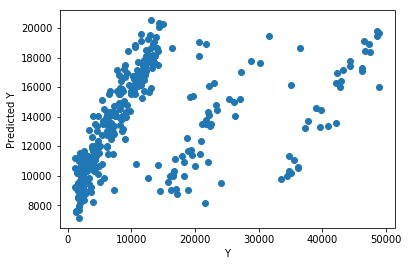

In [20]:
def alphaDecay(alpha, epoch, decay_rate =0.693 ):
    alpha = alpha*(1/(1+decay_rate*epoch))
    return alpha

def GradientDescentAlpha2(X, y, alpha = 0.001, n_iterations = 100):
    X_b = np.c_[np.ones((len(X), 1)), X]
    m = len(y)
    W = np.random.randn(X_b.shape[1],1)
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
        W = W - alphaDecay(alpha,iteration,0.9) * gradients
    print('W =','\n',W)
    return W

W_6 = GradientDescentAlpha2(X_train, y_train, alpha= .001, n_iterations = 100000)

X_b_alpha = np.c_[np.ones((len(y_test),1)), X_test]

predictions_alpha = X_b_alpha.dot(W_6)

#plot preictions vs y_test 
plt.scatter(y_test, predictions_alpha)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

print('\n')
print('Alpha decay with Normalization Gradient Descent: ')
print('MAE:', metrics.mean_absolute_error(y_test, predictions_alpha))
print('MSE:', metrics.mean_squared_error(y_test, predictions_alpha))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_alpha)))

# Linear Regression with Normal Equation Implementation


In [21]:
def NormalEquationOwn(X,y):
    X_b = np.c_[np.ones((len(y),1)), X]
    W = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    print('W = \n', W )
    return W

W_3 = NormalEquationOwn(X_train, y_train)

W = 
 [[  9.88066335e+20]
 [  1.00903714e+04]
 [  1.91860390e+05]
 [  1.73771906e+04]
 [  2.27872455e+05]
 [ -9.88066335e+20]
 [ -9.88066335e+20]
 [  8.31101227e+05]
 [  1.21629964e+06]
 [  7.32159769e+05]
 [  3.00789876e+05]]


In [22]:
# add x0 = 1 to each data instance
X_test_b = np.c_[np.ones((len(y_test),1)), X_test]
y_predict = X_test_b.dot(W_3)
print(y_predict)

[[ -356564.3590625]
 [  994303.7690625]
 [-2314626.7728125]
 [  167723.6409375]
 [   36651.6409375]
 [-1003906.7728125]
 [ -348546.7728125]
 [ -485642.124375 ]
 [ -741762.7728125]
 [ -747786.124375 ]
 [ -487636.3590625]
 [-1790338.7728125]
 [ -749780.3590625]
 [ -348546.7728125]
 [ -356564.3590625]
 [ 1871659.6409375]
 [ 1742581.875625 ]
 [  700029.2271875]
 [ -749780.3590625]
 [ -185344.2309375]
 [   36651.6409375]
 [ -709632.2309375]
 [-2582794.124375 ]
 [ 2004725.875625 ]
 [-1796362.124375 ]
 [-1927434.124375 ]
 [-1536212.3590625]
 [  437885.2271875]
 [-1141002.124375 ]
 [  568957.2271875]
 [  692011.6409375]
 [-2453716.3590625]
 [  298795.6409375]
 [ -348546.7728125]
 [  338943.7690625]
 [-1496064.2309375]
 [-2844938.124375 ]
 [ -880852.3590625]
 [-1011924.3590625]
 [-1266050.7728125]
 [  -92426.124375 ]
 [-2969986.7728125]
 [ -185344.2309375]
 [ -479618.7728125]
 [  732159.7690625]
 [-2191572.3590625]
 [-1528194.7728125]
 [-3109076.3590625]
 [-1011924.3590625]
 [-1266050.7728125]


MAE: 1080415.19088
MSE: 1.7512896231e+12
RMSE: 1323362.99748


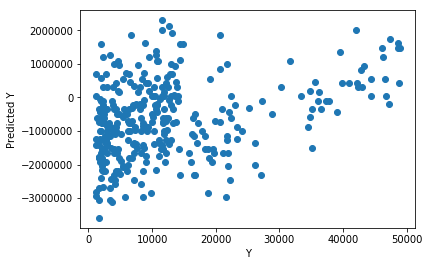

In [23]:
#plot preictions vs y_test 
plt.scatter(y_test, y_predict)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

(array([  1.,   0.,   1.,   0.,   0.,   2.,   1.,   2.,   0.,   0.,   1.,
          4.,   1.,   0.,   3.,   1.,   1.,   2.,   2.,   1.,   4.,   1.,
          6.,   1.,   1.,   1.,   2.,   5.,   1.,   5.,   2.,   7.,   4.,
          6.,   6.,   2.,   5.,   1.,  12.,   2.,   7.,   4.,  13.,   1.,
          6.,  11.,   3.,   9.,   2.,  11.,   0.,  23.,   0.,   6.,   4.,
          2.,  13.,   4.,   6.,   2.,   9.,   0.,  16.,   0.,   5.,   9.,
          1.,  11.,   2.,   8.,   0.,   8.,   1.,   4.,   2.,   2.,   6.,
          1.,   5.,   1.,   4.,   0.,   2.,   0.,   2.,   1.,   1.,   2.,
          1.,   3.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([ -2.29348535e+06,  -2.23460106e+06,  -2.17571676e+06,
         -2.11683247e+06,  -2.05794817e+06,  -1.99906388e+06,
         -1.94017959e+06,  -1.88129529e+06,  -1.82241100e+06,
         -1.76352671e+06,  -1.70464241e+06,  -1.64575812e+06,
         -1.58687382e+06,  -1.52798953e+06,  -1.46910524e+06,
         

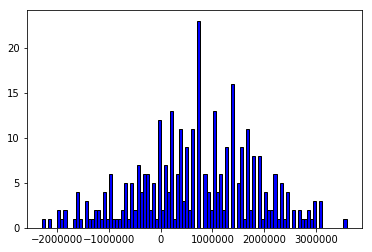

In [24]:
pred = y_predict.reshape(1,len(y_predict))
yp = np.array(y_test).reshape(1,len(y_test))
plt.hist(yp[0] - pred[0], color = 'blue', edgecolor = 'black', bins = 100)

# Scikit-learn Normalization of Data: Linear Regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

df = pd.read_csv("insurance.csv")
df.smoker.replace(['no','yes'], [0,1], inplace = True)
df["female"]=df.sex.replace(['male','female'], [0,1], inplace = False)
df["male"]=df.sex.replace(['male','female'], [1,0], inplace = False)
df.drop('sex',axis=1,inplace = True)
df["northeast"]=df.region.replace(['northeast','southeast','southwest','northwest'], [1,0,0,0], inplace = False)
df["southeast"]=df.region.replace(['northeast','southeast','southwest','northwest'], [0,1,0,0], inplace = False)
df["southwest"]=df.region.replace(['northeast','southeast','southwest','northwest'], [0,0,1,0], inplace = False)
df["northwest"]=df.region.replace(['northeast','southeast','southwest','northwest'], [0,0,0,1], inplace = False)
df.drop('region',axis=1,inplace = True)
X= df[['age','bmi','children','smoker','male','female','northwest','northeast','southwest','southeast']]
y = df[['expenses']]

norm_X = normalize(X, axis=0)
norm_y = normalize(y, axis=0)
#print(norm_X,'\n')
lm = LinearRegression()
lm.fit(pd.DataFrame(norm_X),pd.DataFrame(norm_y))
print("Intercept: ", lm.intercept_,'\n')
print('Coefficient', lm.coef_,'\n')

Intercept:  [  2.76182907e+11] 

Coefficient [[  5.90960666e-01   5.86625370e-01   4.22873181e-02   6.01026636e-01
   -1.41393271e+11  -1.39921480e+11  -4.88091957e+12  -4.87340467e+12
   -4.88091957e+12  -5.16547974e+12]] 



In [26]:
X_train, X_test, y_train, y_test = train_test_split(norm_X,norm_y,test_size=0.25,random_state=49)
print("X_train= ", X_train,'\n')
print("y_train= ", y_train,'\n')
print("X_test= ", X_test,'\n')
print("y_test= ", y_test,'\n')

X_train=  [[ 0.02034948  0.02868005  0.03358145 ...,  0.          0.          0.        ]
 [ 0.01378513  0.01468978  0.01679072 ...,  0.05555556  0.          0.        ]
 [ 0.03085244  0.03147811  0.01679072 ...,  0.          0.05547002  0.        ]
 ..., 
 [ 0.03872966  0.03042884  0.03358145 ...,  0.          0.05547002  0.        ]
 [ 0.03150888  0.02640663  0.03358145 ...,  0.          0.05547002  0.        ]
 [ 0.02494453  0.0238709   0.01679072 ...,  0.05555556  0.          0.        ]] 

y_train=  [[ 0.00810818]
 [ 0.0048208 ]
 [ 0.01302342]
 ..., 
 [ 0.05617712]
 [ 0.0136496 ]
 [ 0.00997667]] 

X_test=  [[ 0.01903661  0.02728103  0.         ...,  0.05555556  0.          0.        ]
 [ 0.02100592  0.03593751  0.         ...,  0.          0.05547002  0.        ]
 [ 0.015098    0.02028589  0.03358145 ...,  0.          0.          0.        ]
 ..., 
 [ 0.03676036  0.02500761  0.         ...,  0.05555556  0.          0.        ]
 [ 0.03347818  0.03243994  0.05037217 ...,  0.05555556

Text(0,0.5,'Predicted Y')

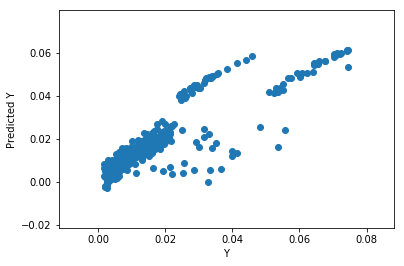

In [27]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

In [28]:
from sklearn import metrics
print('Normalization Linear Regression: ')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Normalization Linear Regression: 
MAE: 0.00591999531119
MSE: 7.47712436531e-05
RMSE: 0.0086470366978


(array([  3.,   2.,   6.,   7.,   2.,   4.,   3.,   2.,   1.,   0.,   0.,
          0.,   0.,   1.,   3.,   1.,   5.,   2.,   5.,   6.,   9.,   6.,
          5.,  17.,  21.,  17.,  13.,  22.,  17.,  19.,  13.,  13.,  17.,
          8.,  10.,   4.,   8.,   2.,   4.,   0.,   0.,   1.,   0.,   0.,
          2.,   0.,   1.,   1.,   4.,   6.,   1.,   7.,   6.,   2.,   3.,
          4.,   1.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   2.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.01682525, -0.01628605, -0.01574685, -0.01520766, -0.01466846,
        -0.01412926, -0.01359007, -0.01305087, -0.01251167, -0.01197247,
        -0.01143328, -0.01089408, -0.01035488, -0.00981569, -0.00927649,
        -0.00873729, -0.00819809, -0.0076589 , -0.0071197 , -0.0065805 ,
        -0.00604131, -0.00

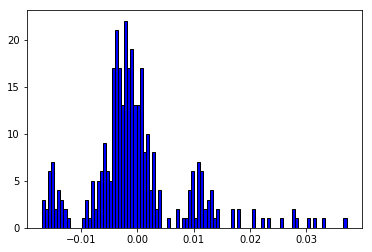

In [29]:
pred = predictions.reshape(1,len(predictions))
yp = np.array(y_test).reshape(1,len(y_test))
plt.hist(yp[0] - pred[0], color = 'blue', edgecolor = 'black', bins = 100)

# Scikit-learn Normalization of Data: Linear Regression

W = 
 [[-0.05155652]
 [ 0.57210111]
 [ 0.67502626]
 [ 0.05023529]
 [ 0.60618685]
 [ 0.47214468]
 [ 0.45787024]
 [ 0.23419933]
 [ 0.25399391]
 [ 0.2172158 ]
 [ 0.21892396]]


Normalization Gradient Descent: 
MAE: 0.00610151396443
MSE: 7.72387191092e-05
RMSE: 0.00878855614474


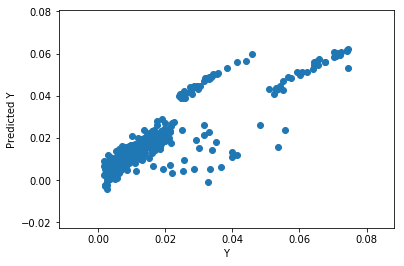

In [30]:
def GradientDescentOwn(X, y, alpha = 0.001, n_iterations = 100):
    X_b = np.c_[np.ones((len(X), 1)), X]
    m = len(y)
    W = np.random.randn(X_b.shape[1],1)
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
        W = W - alpha * gradients
    print('W =','\n',W)
    return W

#The data is already normalize from pervious example. 
X_train_norm = X_train
X_test_norm = X_test
y_train_norm = y_train
y_test_norm = y_test

W_ = GradientDescentOwn(X_train_norm, y_train_norm, alpha= 0.5, n_iterations = 100000)

X_b_norm = np.c_[np.ones((len(y_test_norm),1)), X_test_norm]

predictions_norm = X_b_norm.dot(W_)

#plot preictions vs y_test 
plt.scatter(y_test_norm, predictions_norm)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

print('\n')
print('Normalization Gradient Descent: ')
print('MAE:', metrics.mean_absolute_error(y_test_norm, predictions_norm))
print('MSE:', metrics.mean_squared_error(y_test_norm, predictions_norm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_norm, predictions_norm)))

# Gradient Descent with Normalization

W = 
 [[ 0.00096221]
 [ 0.18529318]
 [ 0.21382951]
 [ 0.0441952 ]
 [ 0.38400929]
 [ 0.13680407]
 [ 0.13260328]
 [ 0.24140031]
 [ 0.25294942]
 [ 0.23209051]
 [ 0.2273024 ]]


Normalization Gradient Descent: 
MAE: 0.0631902381155
MSE: 0.00844354419072
RMSE: 0.0918887598715


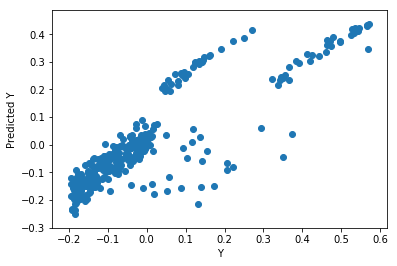

In [31]:

def customNormalize(X):
    maxX = X.max(axis=0)
    minX = X.min(axis =0)
    meanX = X.mean(axis=0)
    X = (X-meanX)/(maxX-minX)
    return X

def GradientDescentOwn(X, y, alpha = 0.001, n_iterations = 100):
    X_b = np.c_[np.ones((len(X), 1)), X]
    m = len(y)
    W = np.random.randn(X_b.shape[1],1)
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
        W = W - alpha * gradients
    print('W =','\n',W)
    return W


norm_X2 = customNormalize(X)
norm_y2 = customNormalize(y)

X_train_norm2, X_test_norm2, y_train_norm2, y_test_norm2 = train_test_split(norm_X2,norm_y2,test_size=0.25,random_state=49)

W_42 = GradientDescentOwn(X_train_norm2, y_train_norm2, alpha= 0.5, n_iterations = 100000)

X_b_norm2 = np.c_[np.ones((len(y_test_norm2),1)), X_test_norm2]

predictions_norm2 = X_b_norm2.dot(W_42)

#plot preictions vs y_test 
plt.scatter(y_test_norm2, predictions_norm2)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

print('\n')
print('Normalization Gradient Descent: ')
print('MAE:', metrics.mean_absolute_error(y_test_norm2, predictions_norm2))
print('MSE:', metrics.mean_squared_error(y_test_norm2, predictions_norm2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_norm2, predictions_norm2)))

# Normalize Gradient Descent with alpha decay

W = 
 [[ 0.00097468]
 [ 0.18661846]
 [ 0.19317644]
 [ 0.04225302]
 [ 0.38376594]
 [-0.60192062]
 [-0.60655797]
 [-0.31021082]
 [-0.29897549]
 [-0.31873073]
 [-0.32183493]]


Alpha decay with Normalization Gradient Descent: 
MAE: 0.0622395327366
MSE: 0.00839252281452
RMSE: 0.0916107134265


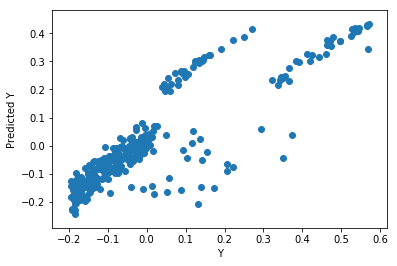

In [32]:
def customNormalize(X):
    maxX = X.max(axis=0)
    minX = X.min(axis =0)
    meanX = X.mean(axis=0)
    X = (X-meanX)/(maxX-minX)
    return X

def alphaDecay(alpha, epoch, decay_rate =0.693 ):
    alpha = alpha*(1/(1+decay_rate*epoch))
    return alpha

def alphaExpDecay(alpha,epoch):
    alpha = alpha*0.95**epoch
    return alpha

def GradientDescentAlpha(X, y, alpha = 0.001, n_iterations = 100):
    X_b = np.c_[np.ones((len(X), 1)), X]
    m = len(y)
    W = np.random.randn(X_b.shape[1],1)
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
        W = W - alphaExpDecay(alpha,iteration) * gradients
    print('W =','\n',W)
    return W

def GradientDescentAlpha2(X, y, alpha = 0.001, n_iterations = 100):
    X_b = np.c_[np.ones((len(X), 1)), X]
    m = len(y)
    W = np.random.randn(X_b.shape[1],1)
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
        W = W - alphaDecay(alpha,iteration) * gradients
    print('W =','\n',W)
    return W


X_train_norm_alpha = X_train_norm2 
X_test_norm_alpha = X_test_norm2 
y_train_norm_alpha = y_train_norm2
y_test_norm_alpha = y_test_norm2

W_5 = GradientDescentAlpha(X_train_norm_alpha, y_train_norm_alpha, alpha= 5, n_iterations = 100000)

X_b_norm_alpha = np.c_[np.ones((len(y_test_norm_alpha),1)), X_test_norm_alpha]

predictions_norm_alpha = X_b_norm_alpha.dot(W_5)

#plot preictions vs y_test 
plt.scatter(y_test_norm_alpha, predictions_norm_alpha)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

print('\n')
print('Alpha decay with Normalization Gradient Descent: ')
print('MAE:', metrics.mean_absolute_error(y_test_norm_alpha, predictions_norm_alpha))
print('MSE:', metrics.mean_squared_error(y_test_norm_alpha, predictions_norm_alpha))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_norm_alpha, predictions_norm_alpha)))